# BERT 란?
* Bidirectional Encoder Representations from Transformers의 약자입니다.
* 이전 모델과 달리 BERT는 모든 계층에서 좌우 맥락을 모두 고려하여 심층적인 양방향 표현을 사전 학습합니다.
* BERT에 단 하나의 출력 계층만 추가하여 미세 조정하면 다양한 작업에 대해 최첨단 모델을 만들 수 있습니다.

#**1. Introduction**

* 언어 모델의 사전 학습은 많은 자연어처리 분야에서 효과적임을 보였음
* 언어 모델의 사전 학습에는 크게 두 가지 학습 전략이 있음. 두 가지 전략은 모두 general language representation을 학습하기 위해서 단방향의 언어 모델을 사용함.
  * 피처 베이스( feature-based ) : ELMO
    * 임베딩은 그대로 두고 그 위의 레이어만을 학습하는 방식
    * 사전 학습 단계에서부터 특정 task에 맞게 학습된 모델을 feature로 사용
  * 파인 튜닝( fine-tuning ) : Generative Pre-trained Transformer(GPT)
    * 모든 파라미터를 미세하게 업데이트하는 방식(임베딩 포함)
    * 범용적으로 task-specific하지 않게 학습된 모델을 이용. 이후에 downstream task에서 특정 task에 맞게 파라미터를 미세하게 조정하는 방식.
* 논문에서는 현재의 학습 전략이(특히 fine-tuning) 한계점이 있다고 주장.
    * 가장 큰 문제는 사용하는 모델이 단방향이라는 것이고, 이는 양방향에서의 문맥 정보가 모두 중요한 token-level task(ex. Named Entity Recognition, Question Answering)에서 높은 성능을 보이지 못 하는 원인이라고 함.
    * → Bidirectional Encoder Representations from Transformers(BERT) 제안
* BERT는 Masked Language Model(MLM)을 사용하여 양방향의 문맥을 학습할 수 있도록 함.
    * MLM은 문장 내의 토큰 중 랜덤하게 단어를 선택하여 마스킹하고, 모델이 양방향의 문맥을 통하여 해당 위치의 단어를 예측하는 방식

# **2. BERT**


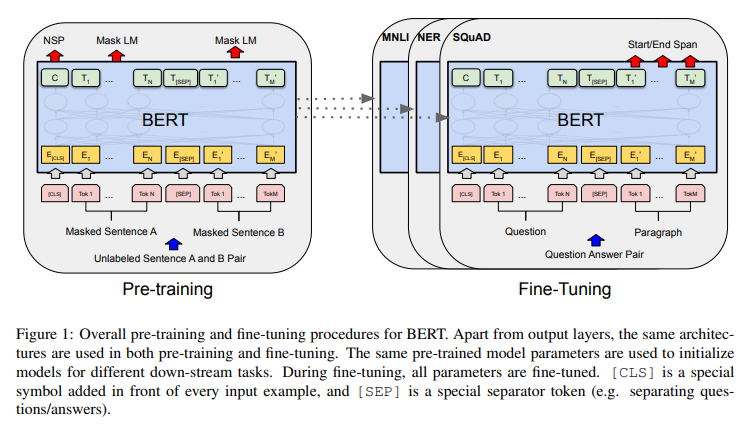

# BERT에는 두 가지 단계가 존재 : pre-training, fine-tuning
- **pre-training**
  - 레이블이 없는 데이터를 이용하여 학습
- **fine-tuning**
  - pre-training 단계에서 학습한 파라미터를 이용하여 초기화를 하고, 레이블이 있는 데이터를 이용하여 task에 맞게 하이퍼파라미터를 조정.
  - 같은 pre-trained 모델을 사용하더라도 task에 따라서 각각의 모델을 가지게 됨.

## Model Architecture
- BERT는 Transformer의 인코더를 다중으로 양방향으로 쌓은 구조.
- 논문에서는 모델의 크기에 따라서 BERT `BASE`, BERT `LARGE`로 구분하고 각 모델의 결과를 보여줌
  - L : number of layers(i.e., Transformer blocks)
  - A : number of self-attention heads
    - base : (L=12, H=768, A=12, total params = 110M)
    - large : (L=24, H=1024, A=16, total params = 340M)



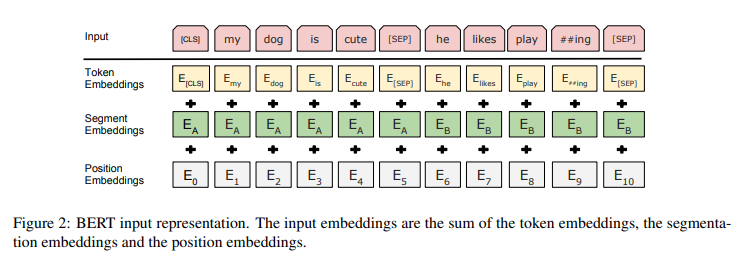

# Input/Output Representations
  * 단일 문장이 아닌 문장의 쌍(e.g., <Question, Answer>)을 학습해야 하는 태스크를 위해서 하나의 입력 문장 시퀀스에서 두 개의 문장을 표현할 수 있도록 함.
  * WordPiece embedding을 사용하여 30,000개의 단어를 학습.
  * 입력의 첫 토큰은 항상 classification token([CLS])로 시작.
    * 마지막 hidden state에서의 이 토큰은 입력 전체의 정보를 모두 가지게 되고, classification task에서 이용.
  * 문장 쌍은 하나의 입력 시퀀스로 합쳐서 사용하는데, 이 두 개의 문장을 구분할 때는 아래 두 가지 방법을 활용함.
    * [SEP] 토큰을 두 개의 문장 사이에 추가하여 구분.
    * 임베딩 레이어에서 현재의 토큰이 어떤 문장에 속하는지(A or B)를 추가함(= segment embeddings ⭡⭡⭡ 사진 ).

메모장```
이 논문은 자연어 처리(NLP) 분야에서 큰 혁신을 가져온 연구입니다.

이 논문은 BERT 모델의 구조와 학습 방법을 상세히 설명하며,
왜 이 모델이 다양한 NLP 작업에서 뛰어난 성능을 발휘하는지 논의합니다.


파인튜닝(fine-tuning):
모든 것을(그러나 조금은 미세하게) 업데이트 시키기, 임베딩까지 모두 업데이트하는 기법

피처베이스(feature-based):
임베딩은 그대로 두고 그 위에 레이어만 학습 하는 방법


피처베이스(feature-based): 임베딩은 그대로 두고 그 위에 레이어만 학습 하는 방법

Fine-tuning approach에는 BERT를 예시로 들 수 있으며, 어떤 특정 task에 대한 parameter를 최소화하여 범용적인 pre-trained 모델을 사용합니다. 그리고 특정 task를 수행할 경우 그에 맞게 fine-tuning을 적용한다.

BERT는 기본적으로 대용량의 unlabeled data로 pre-training을 진행하고 특정 task에 대해 BERT를 여러 대로 복사해 transfer learning을 진행하게 됩니다. 즉, pre-trained 모델이 기반이 되는 것이다.
```

## 3.1 Pre-training BERT
BERT는 기존 방식과는 다르게 Masked Language Model(MLM), Next Sentence Prediction(NSP)라는 2가지 Unsupervised task를 사용하여 사전 학습을 진행함.

### Task #1: Masked LM
- 기존 방식에서는 left-to-right와 right-to-left 모델을 단순하게 concat하여 사용했다는 점에서 양방향 문맥을 제대로 학습할 수 없었음 -> MLM 방식 사용
- 기존 방식을 보완하기 위해서 입력 문장의 15%를 랜덤으로 마스킹하고, 마스킹한 토큰을 예측하도록 학습을 함. 이를 논문에서는 "masked LM(MLM)"이라고 표현.
  - 이 경우에는 마스킹된 토큰에 대응되는 마지막 hidden vector에 softmax를 적용하여 어떤 단어인지 예측하는 방식으로 학습이 됨.
- 논문에서는 각 입력 시퀀스의 WordPiece 단위의 토큰 중에서 15%를 랜덤으로 선택하여 마스킹하여 실험을 진행함.

#### 마스킹 적용 방식
1. i 번째로 마스킹할 토큰으로 선택되었을 때,
  - 80%는 [MASK] 토큰으로 교체
  - 10%는 다른 토큰으로 교체
  - 10%는 현재 토큰(원래 토큰)을 그대로 유지

### Task #2: Next Sentence Prediction(NSP)
- Question Answering(QA)와 Natural Language Inference(NLI)와 같은 task에서는 두 개의 문장 간의 **관계**를 파악하는 것이 중요함 -> NSP 적용
  - 두 개의 문장이 이어지는 문장인지 아닌지를 구분하는 방식으로 학습
- 학습 코퍼스에서는 문장 A와 다음 문장 B를 실제 다음 문장(label은 IsNext)이고, 50%는 랜덤으로 선택된 문장(label은 NotNext)임.
  - 이 때, 앞서 설명했던 [CLS] 토큰의 마지막 hidden state인 h를 이용하여 문장 A와 B가 IsNext인지 NotNext인지 예측하게 됨.

### Pre-training data
- BooksCorpus(800M words) + English Wikipedia(2,500M words) 를 이용하여 사전학습.
  - 위키피디아에서는 텍스트만을 추출하여 리스트, 표, 헤더 등은 무시.
  - 연속된 긴 시퀀스를 추출하기 위해서는 Billion Word Benchmark와 같은 문장 단위의 코퍼스보다는 문서 단위의 코퍼스를 사용하는 것이 중요함.


## 3.2 Fine-tuning BERT
- 이미 BERT는 사전 학습 단계에서 Transformer의 self-attention mechanism으로 입력이 단일 문장이던 문장 쌍이던 이를 잘 모델링할 수 있기 때문에 fine-tuning 단계는 간단하게 이루어짐.



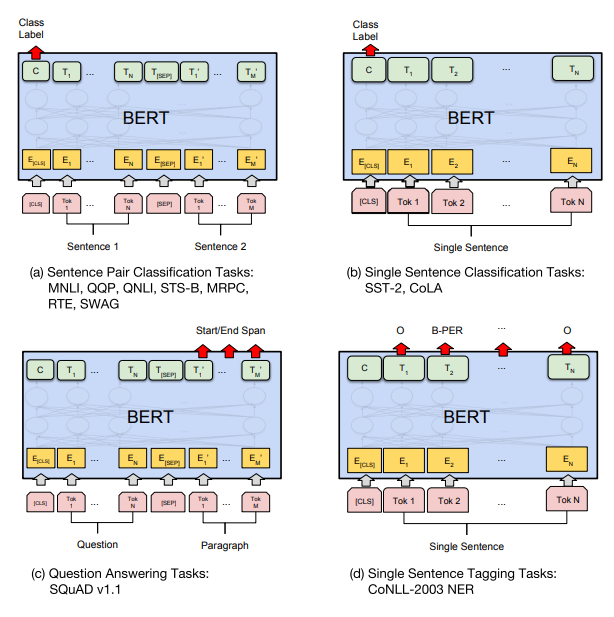

특정 task에 따라서 fine-tuning 방식에 약간의 차이가 있기 때문에 논문에서는 4개의 task에 따른 학습 방식을 보여줌

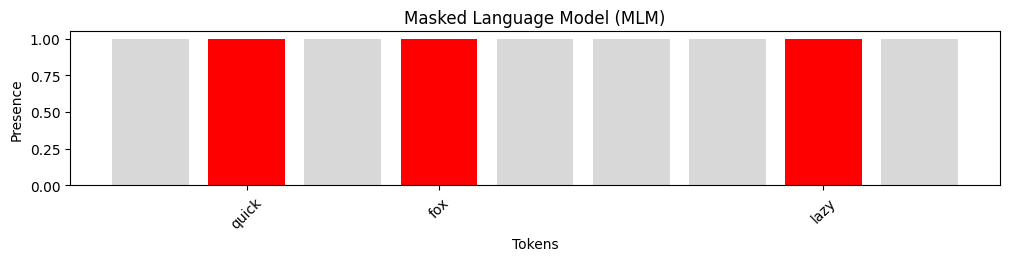

In [ ]:
import matplotlib.pyplot as plt

# Example sentence
sentence = "The quick brown fox jumps over the lazy dog"
tokens = sentence.split()
mask_indices = [1, 3, 7]

# Masked sentence
masked_sentence = tokens.copy()
for idx in mask_indices:
    masked_sentence[idx] = '[MASK]'

# Visualization
plt.figure(figsize=(12, 2))
plt.title('Masked Language Model (MLM)')
plt.bar(range(len(tokens)), [1] * len(tokens), tick_label=tokens, color='gray', alpha=0.3)
plt.bar(mask_indices, [1] * len(mask_indices), tick_label=[tokens[i] for i in mask_indices], color='red')
plt.xticks(rotation=45)
plt.xlabel('Tokens')
plt.ylabel('Presence')
plt.show()


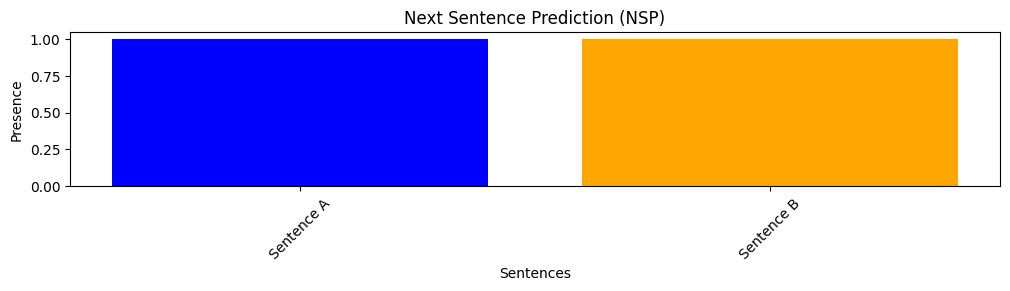

In [ ]:
import matplotlib.pyplot as plt

# Example sentences
sentence_A = "The quick brown fox jumps over the lazy dog."
sentence_B = "It is a bright sunny day."

# Visualization
plt.figure(figsize=(12, 2))
plt.title('Next Sentence Prediction (NSP)')
plt.bar([0, 1], [1, 1], tick_label=['Sentence A', 'Sentence B'], color=['blue', 'orange'])
plt.xticks(rotation=45)
plt.xlabel('Sentences')
plt.ylabel('Presence')
plt.show()


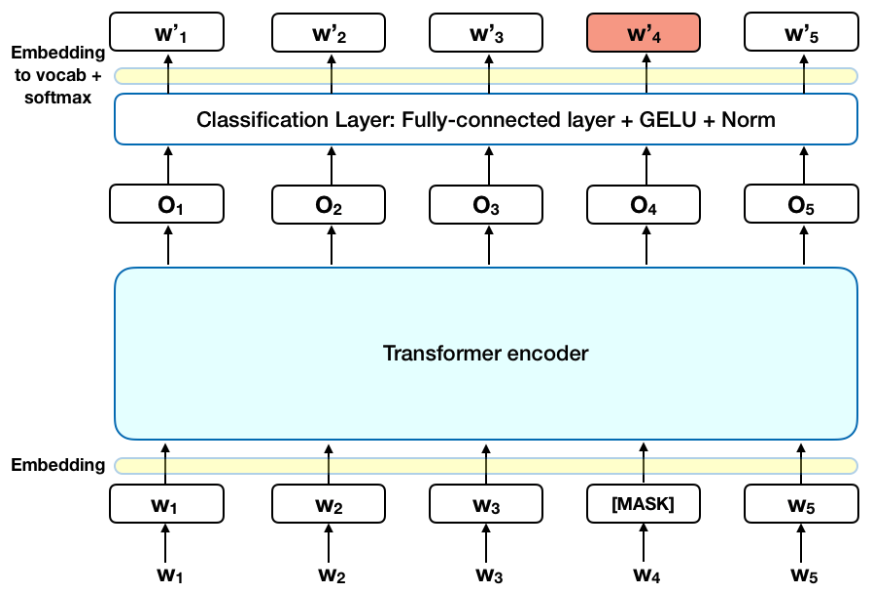